# Africa PD Publications

In [1]:
import pandas as pd
import plotly.graph_objects as go
from datetime import date

In [2]:
# themes = pd.read_table("https://raw.githubusercontent.com/ahmedmoustafa/AfricaPD/main/data/themes_long.tsv")
themes = pd.read_table("data/themes_clean.tsv")
themes.head()

,study_id,theme,name
0,1,Genetics,Tunisia
1,2,Genetics,Tunisia
2,3,Genetics,Algeria
3,3,Genetics,Tunisia
4,3,Genetics,Morocco


In [3]:
themes2 = themes.groupby(by = ["name", "theme"]).size().sort_values(ascending=False).reset_index(name = "count")
themes2.head()

,name,theme,count
0,Tunisia,Genetics,22
1,South Africa,Genetics,19
2,Nigeria,Clinical Features,18
3,Morocco,Genetics,8
4,Algeria,Genetics,7


In [4]:
themes2.tail()

,name,theme,count
75,Malawi,Risk Factors,1
76,Morocco,Management And Access To Care,1
77,Mozambique,Risk Factors,1
78,Namibia,Management And Access To Care,1
79,Zimbabwe,Management And Access To Care,1


In [5]:
countires = pd.read_table ("https://raw.githubusercontent.com/ahmedmoustafa/AfricaPD/main/data/countries.tsv") # Reference https://developers.google.com/public-data/docs/canonical/countries_csv
countires.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [6]:
df = pd.merge (themes2, countires, on = "name", how = "left", indicator="indicator")
df.head()

,name,theme,count,country,latitude,longitude,indicator
0,Tunisia,Genetics,22,TN,33.886917,9.537499,both
1,South Africa,Genetics,19,ZA,-30.559482,22.937506,both
2,Nigeria,Clinical Features,18,NG,9.081999,8.675277,both
3,Morocco,Genetics,8,MA,31.791702,-7.092620,both
4,Algeria,Genetics,7,DZ,28.033886,1.659626,both


In [7]:
df.tail()

,name,theme,count,country,latitude,longitude,indicator
75,Malawi,Risk Factors,1,MW,-13.254308,34.301525,both
76,Morocco,Management And Access To Care,1,MA,31.791702,-7.092620,both
77,Mozambique,Risk Factors,1,MZ,-18.665695,35.529562,both
78,Namibia,Management And Access To Care,1,NaN,-22.957640,18.490410,both
79,Zimbabwe,Management And Access To Care,1,ZW,-19.015438,29.154857,both


In [8]:
missing = df[df["indicator"] == "left_only"]
missing

,name,theme,count,country,latitude,longitude,indicator


In [9]:
groups = df['theme'].unique()
groups

array(['Genetics', 'Clinical Features', 'Education And Training',
       'Epidemiology', 'Risk Factors', 'Management And Access To Care',
       'Patient Engagement And Qol', 'Clinical', 'Risk Factor'],
      dtype=object)

In [10]:
len(groups)

9

In [11]:
#groups2 = pd.DataFrame({'theme' : list(groups), 'color' : ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999', "#000000"]})
groups2 = pd.DataFrame({'theme' : list(groups), 'color' : ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']})
groups2

,theme,color
0,Genetics,#e41a1c
1,Clinical Features,#377eb8
2,Education And Training,#4daf4a
3,Epidemiology,#984ea3
4,Risk Factors,#ff7f00
5,Management And Access To Care,#ffff33
6,Patient Engagement And Qol,#a65628
7,Clinical,#f781bf
8,Risk Factor,#999999


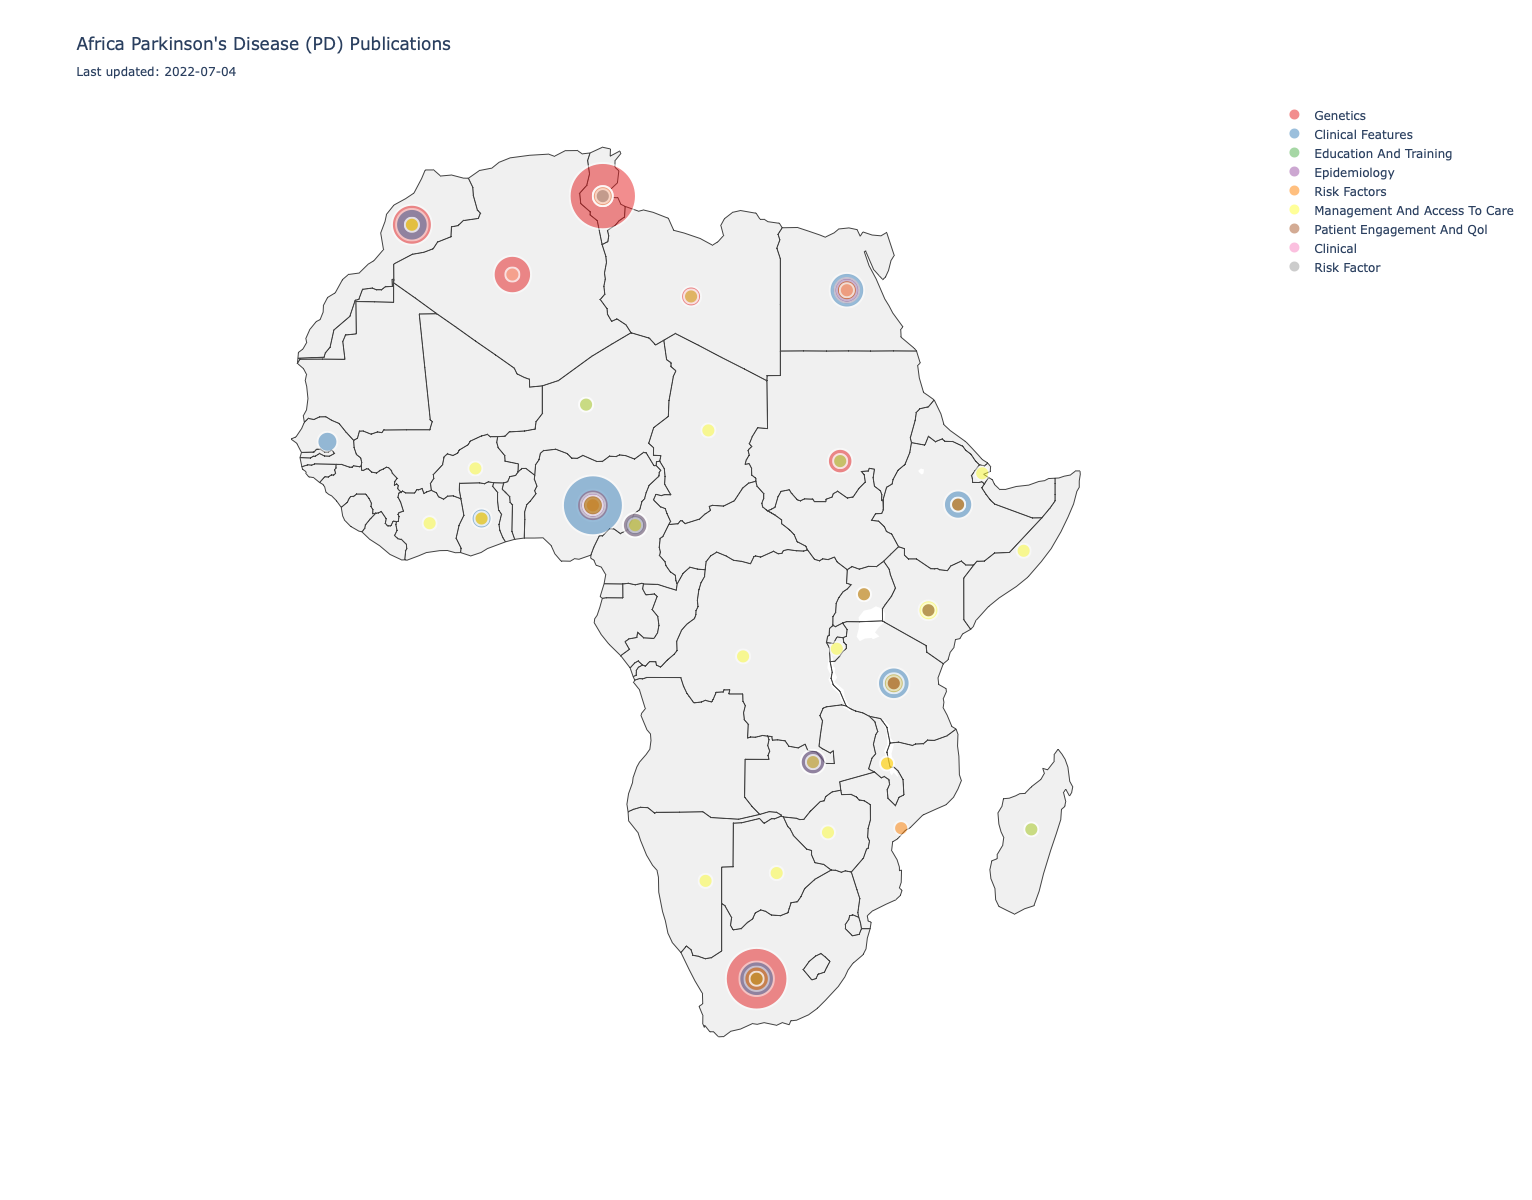

In [28]:
fig = go.Figure()

for i in range(len(groups2)):

    theme = groups2.iloc[i]["theme"]
    
    color = groups2.iloc[i]["color"]
    
    sub = df[df["theme"] == theme]
    
    fig.add_trace(go.Scattergeo(
        lon = sub['longitude'],
        lat = sub['latitude'],
        text = sub['name'],
        marker = dict(
            size = sub['count'],
            color = color,
            # line_color = 'rgb(40,40,40)',
            line_color = 'rgb(255,255,255)',
            line_width = 2,  # 0.5,
            sizemode = 'area',
            opacity = 0.5,
            sizeref = 0.01
            # sizeref = 0.05
        ),
        name = theme))
    
fig.update_layout(
        title_text = "Africa Parkinson's Disease (PD) Publications<br><sub>Last updated: " + str(date.today()) + "</sub>",
        showlegend = True,
        legend = {'itemsizing': 'constant'},
        geo = dict(
            scope = 'africa',
            landcolor = 'rgb(240, 240, 240)',
#            landcolor = 'rgb(217, 217, 217)',
        ),
    
        autosize=False,
        width = 800,
        height = 1200
    )

fig.show()

In [29]:
fig.write_image("figures/AfricaPDpublications.pdf")

In [30]:
fig.write_html("docs/index.html", full_html=False, include_plotlyjs='cdn')